In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df = pd.read_csv('Analysis of Super Store - DA (1).csv')

In [4]:
df


,Ship Mode,Segment,Country,City,State,Postal Code,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
0,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Bookcases,261.9600,2,0.00,41.9136
1,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Chairs,731.9400,3,0.00,219.5820
2,Second Class,Corporate,United States,Los Angeles,California,90036,West,Office Supplies,Labels,14.6200,2,0.00,6.8714
3,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Furniture,Tables,957.5775,5,0.45,-383.0310
4,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Office Supplies,Storage,22.3680,2,0.20,2.5164
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9989,Second Class,Consumer,United States,Miami,Florida,33180,South,Furniture,Furnishings,25.2480,3,0.20,4.1028
9990,Standard Class,Consumer,United States,Costa Mesa,California,92627,West,Furniture,Furnishings,91.9600,2,0.00,15.6332
9991,Standard Class,Consumer,United States,Costa Mesa,California,92627,West,Technology,Phones,258.5760,2,0.20,19.3932
9992,Standard Class,Consumer,United States,Costa Mesa,California,92627,West,Office Supplies,Paper,29.6000,4,0.00,13.3200


In [5]:
print("First few rows of the DataFrame:")
print(df.head())

First few rows of the DataFrame:
        Ship Mode    Segment        Country             City       State  \
0    Second Class   Consumer  United States        Henderson    Kentucky   
1    Second Class   Consumer  United States        Henderson    Kentucky   
2    Second Class  Corporate  United States      Los Angeles  California   
3  Standard Class   Consumer  United States  Fort Lauderdale     Florida   
4  Standard Class   Consumer  United States  Fort Lauderdale     Florida   

   Postal Code Region         Category Sub-Category     Sales  Quantity  \
0        42420  South        Furniture    Bookcases  261.9600         2   
1        42420  South        Furniture       Chairs  731.9400         3   
2        90036   West  Office Supplies       Labels   14.6200         2   
3        33311  South        Furniture       Tables  957.5775         5   
4        33311  South  Office Supplies      Storage   22.3680         2   

   Discount    Profit  
0      0.00   41.9136  
1      0.00

In [6]:
print("\nCheck for missing values:")
print(df.isnull().sum())


Check for missing values:
Ship Mode       0
Segment         0
Country         0
City            0
State           0
Postal Code     0
Region          0
Category        0
Sub-Category    0
Sales           0
Quantity        0
Discount        0
Profit          0
dtype: int64


In [7]:
sales_by_category = df.groupby(['Category', 'Sub-Category'])['Sales'].sum().reset_index()


In [8]:
sales_by_category

,Category,Sub-Category,Sales
0,Furniture,Bookcases,114879.9963
1,Furniture,Chairs,328449.1030
2,Furniture,Furnishings,91705.1640
3,Furniture,Tables,206965.5320
4,Office Supplies,Appliances,107532.1610
5,Office Supplies,Art,27118.7920
6,Office Supplies,Binders,203412.7330
7,Office Supplies,Envelopes,16476.4020
8,Office Supplies,Fasteners,3024.2800
9,Office Supplies,Labels,12486.3120


In [10]:
profit_by_category = df.groupby(['Category', 'Sub-Category'])['Profit'].sum().reset_index()
print("Profit by Category:")
profit_by_category

Profit by Category:


,Category,Sub-Category,Profit
0,Furniture,Bookcases,-3472.5560
1,Furniture,Chairs,26590.1663
2,Furniture,Furnishings,13059.1436
3,Furniture,Tables,-17725.4811
4,Office Supplies,Appliances,18138.0054
5,Office Supplies,Art,6527.7870
6,Office Supplies,Binders,30221.7633
7,Office Supplies,Envelopes,6964.1767
8,Office Supplies,Fasteners,949.5182
9,Office Supplies,Labels,5546.2540


In [11]:
top_products = sales_by_category.nlargest(10, 'Sales')
print("Top Product:")
top_products

Top Product:


,Category,Sub-Category,Sales
16,Technology,Phones,330007.0540
1,Furniture,Chairs,328449.1030
11,Office Supplies,Storage,223843.6080
3,Furniture,Tables,206965.5320
6,Office Supplies,Binders,203412.7330
15,Technology,Machines,189238.6310
13,Technology,Accessories,167380.3180
14,Technology,Copiers,149528.0300
0,Furniture,Bookcases,114879.9963
4,Office Supplies,Appliances,107532.1610


In [12]:
most_profitable_categories = profit_by_category.groupby('Category')['Profit'].sum().reset_index().sort_values(by='Profit', ascending=False)
print("Most Profitable Categories:")
most_profitable_categories

Most Profitable Categories:


,Category,Profit
2,Technology,145454.9481
1,Office Supplies,122490.8008
0,Furniture,18451.2728


In [13]:
average_discount_by_category = df.groupby('Category')['Discount'].mean().reset_index()
print("Average Discount by  Categories:")
average_discount_by_category

Average Discount by  Categories:


,Category,Discount
0,Furniture,0.173923
1,Office Supplies,0.157285
2,Technology,0.132323


In [14]:
top_regions_by_sales = df.groupby('Region')['Sales'].sum().reset_index().nlargest(5, 'Sales')
print("Top Regoins by sale  :")
top_regions_by_sales

Top Regoins by sale  :


,Region,Sales
3,West,725457.8245
1,East,678781.2400
0,Central,501239.8908
2,South,391721.9050


C:\Users\Admin\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


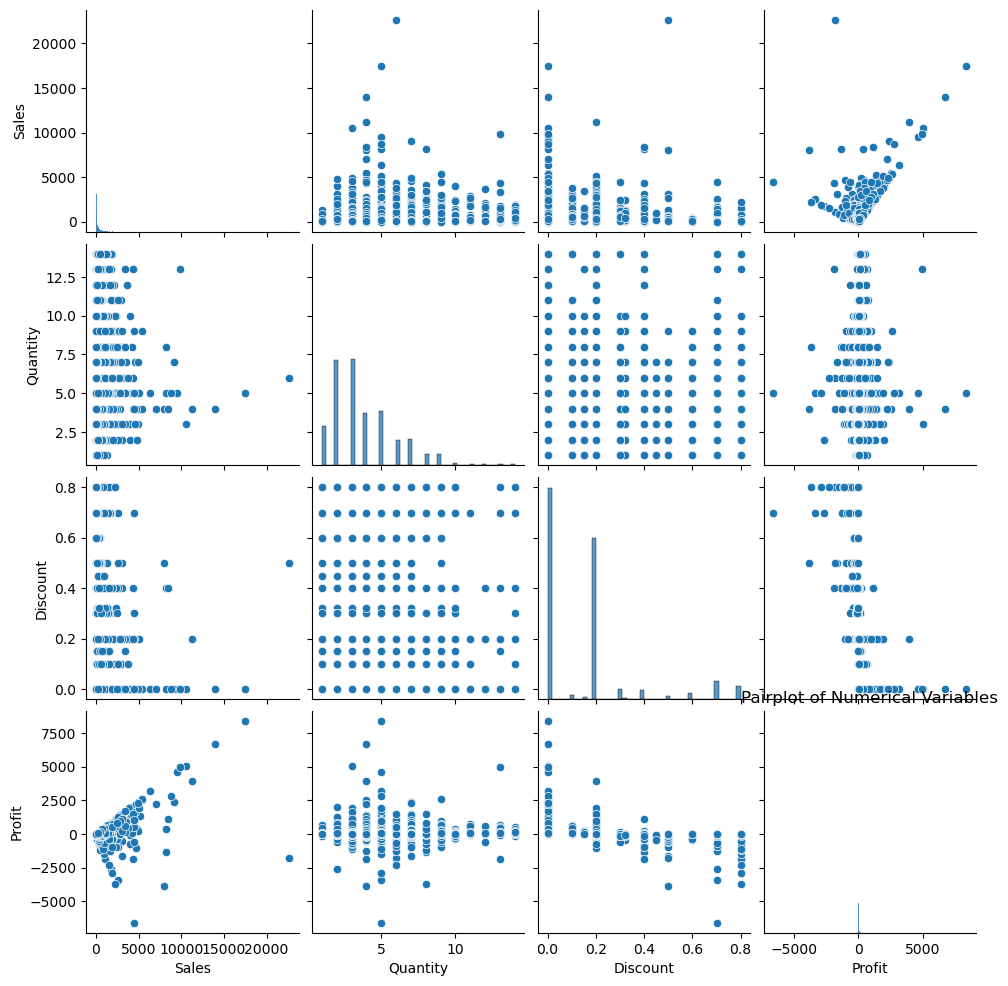

In [15]:
sns.pairplot(df[['Sales', 'Quantity', 'Discount', 'Profit']])
plt.title('Pairplot of Numerical Variables')
plt.show()

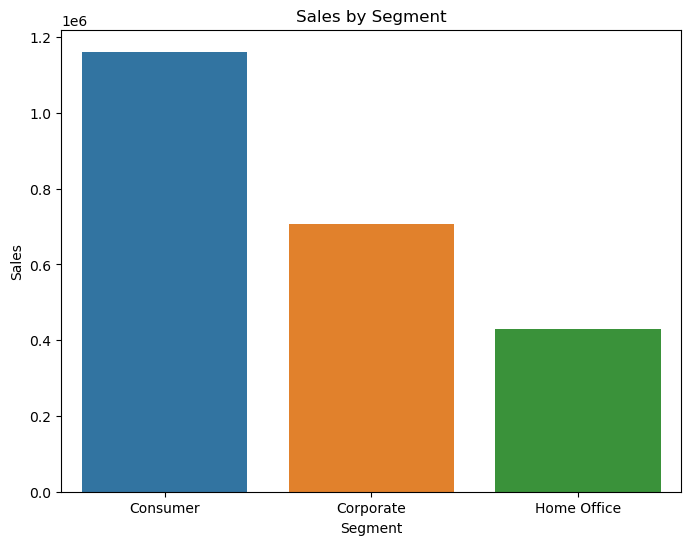

In [18]:
sales_by_segment = df.groupby('Segment')['Sales'].sum().reset_index()
plt.figure(figsize=(8, 6))
sns.barplot(data=sales_by_segment, x='Segment', y='Sales')
plt.title('Sales by Segment')
plt.xlabel('Segment')
plt.ylabel('Sales')
plt.show()